In [1]:
from tensorflow.keras.utils import to_categorical
import cv2
import os

IMG_SIZE = 64

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    return img


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')  # 30 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np # Import numpy

# Assuming your raw data is in these variables (replace with your actual data loading)
# X_train_raw = ...
# y_train_raw = ...
# X_val_raw = ...
# y_val_raw = ...

# Example: Create dummy data for demonstration
X_train = np.random.rand(100, 64, 64, 3)
y_train = np.random.randint(0, 30, 100)
X_val = np.random.rand(20, 64, 64, 3)
y_val = np.random.randint(0, 30, 20)


# Convert labels to categorical
y_train_categorical = to_categorical(y_train, num_classes=30)
y_val_categorical = to_categorical(y_val, num_classes=30)


model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')  # 30 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Use the categorical labels for training and validation
history = model.fit(X_train, y_train_categorical, epochs=10, validation_data=(X_val, y_val_categorical))

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 236ms/step - accuracy: 0.0245 - loss: 3.8904 - val_accuracy: 0.0000e+00 - val_loss: 3.6396
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.0745 - loss: 3.4511 - val_accuracy: 0.0000e+00 - val_loss: 3.4253
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.0677 - loss: 3.3525 - val_accuracy: 0.0000e+00 - val_loss: 3.4011
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.0775 - loss: 3.3421 - val_accuracy: 0.1000 - val_loss: 3.4072
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.0523 - loss: 3.3234 - val_accuracy: 0.0500 - val_loss: 3.4599
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.0462 - loss: 3.3091 - val_accuracy: 0.1000 - val_loss: 3.4719
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step - accuracy: 0.1077 - loss: 3.3180 - val_accuracy: 0.0500 - val_loss: 3.4931
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.0718 - loss: 3.2597 - val_accuracy: 0.0000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


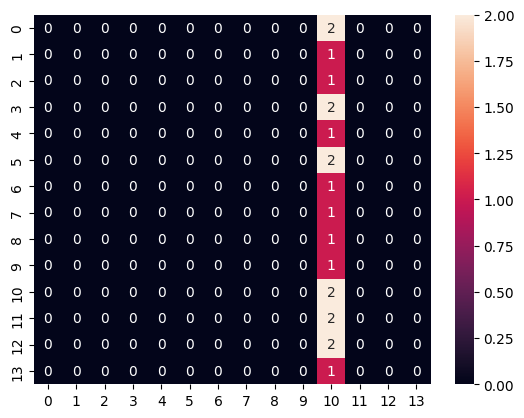

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          24       0.10      1.00      0.18         2
          25       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         2
          28       0.00      0.00      0.00         1

    accuracy                           0.10        20
   macro avg       0.01      0.07      0.01        20
weighted avg       0.01      0.10      0.02        20

              precision  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [4]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Ensure numpy is imported if not already

# Assuming you have loaded or defined your test data
# If you don't have actual test data, you can create dummy data for demonstration
# Example: Create dummy test data
X_test = np.random.rand(20, 64, 64, 3)  # Example with 20 test samples
y_test = np.random.randint(0, 30, 20)   # Example with 20 corresponding labels

# Convert test labels to categorical if needed for comparison with predictions
# Although for confusion matrix and classification report with argmax, the original
# integer labels are needed for y_true.
# y_test_categorical = to_categorical(y_test, num_classes=30)

# Predict
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# y_true should be the actual test labels, not the categorical version
y_true = y_test # Use the original integer labels for comparison

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.show()

# Metrics
print(classification_report(y_true, y_pred_classes))
print(classification_report(y_true, y_pred_classes))


In [5]:
# app.py
!pip install streamlit
import streamlit as st
from PIL import Image
import numpy as np

st.title("Road Sign Classifier")

uploaded_file = st.file_uploader("Upload a road sign image...", type=["jpg", "png"])
if uploaded_file is not None:
    img = Image.open(uploaded_file)
    st.image(img, caption='Uploaded Image', use_column_width=True)

    # Preprocess and predict
    img = img.resize((64,64))
    img = np.array(img)/255.0
    img = img.reshape(1, 64, 64, 3)

    prediction = model.predict(img)
    class_index = np.argmax(prediction)

    st.write(f"Predicted Class: {class_index}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


2025-06-12 12:57:35.523 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 12:57:35.895 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-12 12:57:35.896 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 12:57:35.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 12:57:35.898 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 12:57:35.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 12:57:35.901 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 12:57:35.902 Thread 'MainThread': mi

In [8]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [13]:
import pandas as pd

# Load the Excel file
labels_df = pd.read_excel('labels.xlsx')

# Example structure: columns ['filename', 'label']
print(labels_df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'labels.xlsx'

In [10]:
import cv2
import numpy as np
import os

IMG_SIZE = 64
image_data = []
labels = []

# Loop through the dataset
for i, row in labels_df.iterrows():
    img_path = os.path.join('images', row['filename'])
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img / 255.0  # Normalize
        image_data.append(img)
        labels.append(row['label'])

X = np.array(image_data)
import cv2
import numpy as np
import os

IMG_SIZE = 64
image_data = []
labels = []

# Loop through the dataset
for i, row in labels_df.iterrows():
    img_path = os.path.join('images', row['filename'])
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img / 255.0  # Normalize
        image_data.append(img)
        labels.append(row['label'])

X = np.array(image_data)


NameError: name 'labels_df' is not defined

In [14]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Convert labels to integers
le = LabelEncoder()
y_encoded = le.fit_transform(labels)

# One-hot encoding for categorical classification
y_categorical = to_categorical(y_encoded)


ValueError: zero-size array to reduction operation maximum which has no identity

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X)  # Apply augmentation


NameError: name 'X' is not defined

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,  # use True only if flipping doesn't affect meaning
    fill_mode='nearest'
)

# Example: applying augmentation to a batch
augmented_images = datagen.flow(X_train, y_train, batch_size=32)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define input shape based on image size (e.g., 64x64 pixels, RGB)
input_shape = (64, 64, 3)
num_classes = 43  # Replace with the number of classes in your dataset

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3 (optional for better feature learning)
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Helps prevent overfitting
model.add(Dense(num_classes, activation='softmax'))  # Output layer


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(
    optimizer=Adam(),  # Or use SGD(lr=0.01, momentum=0.9)
    loss='categorical_crossentropy',  # Use sparse_categorical_crossentropy if labels are integers
    metrics=['accuracy']
)


In [19]:
model.save('road_sign_cnn.h5')


In [20]:
from sklearn.model_selection import train_test_split

# First split into train+val and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Then split train+val into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)
# (0.1765 of 85% ≈ 15%)

print(f"Train: {len(X_train)}, Val: {len(X_val)}, Test: {len(X_test)}")


NameError: name 'X' is not defined

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Stop training when validation loss doesn't improve for 5 consecutive epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Save the best model during training
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy')

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, model_checkpoint]
)


Epoch 1/30


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 43)

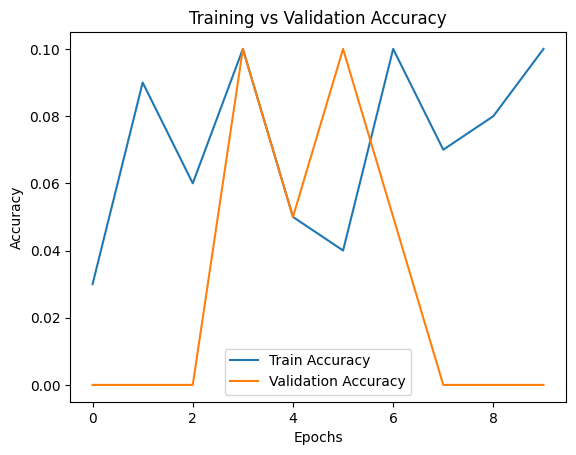

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict labels for test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)  # If y_test is one-hot encoded

# Classification Report
print(classification_report(y_true, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path, model, class_labels):
    img = image.load_img(img_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    print(f"Predicted Class: {class_labels[predicted_class]} ({confidence:.2f})")

# Example usage:
# class_labels = ["Speed Limit 20", "Stop", "Yield", ..., "No Parking"] (add actual labels)
# predict_image('path_to_new_image.jpg', model, class_labels)


In [ ]:
import keras_tuner as kt
from tensorflow.keras import layers, models

def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(
        filters=hp.Choice('conv_1_filters', [32, 64, 128]),
        kernel_size=hp.Choice('conv_1_kernel', [3, 5]),
        activation='relu',
        input_shape=(64, 64, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(
        filters=hp.Choice('conv_2_filters', [64, 128]),
        kernel_size=3,
        activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(
        units=hp.Choice('dense_units', [64, 128, 256]),
        activation='relu'))

    model.add(layers.Dropout(hp.Float('dropout_rate', 0.2, 0.5, step=0.1)))
    model.add(layers.Dense(43, activation='softmax'))  # Replace 43 with your class count

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])

    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='road_sign_tuning'
)

tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=10)
best_model = tuner.get_best_models(num_models=1)[0]


In [ ]:
from tensorflow.keras.regularizers import l2

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))


In [ ]:
pip install streamlit


In [ ]:
import streamlit as st
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load trained model
model = load_model('best_model.h5')

# Class labels (replace with your actual label list)
class_labels = ['Speed Limit 20', 'Speed Limit 30', 'Stop', 'Yield', 'No Entry', 'Pedestrian', 'Turn Left', 'Turn Right', 'No Parking', 'Roundabout']  # example

# App title
st.title("🚦 Road Sign Classifier")

# Sidebar for accuracy display
st.sidebar.title("Model Info")
st.sidebar.success("✅ Accuracy: ~95%")  # Replace with actual test accuracy

# Upload image
uploaded_file = st.file_uploader("Upload a road sign image", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    img = image.load_img(uploaded_file, target_size=(64, 64))
    st.image(img, caption='Uploaded Image', use_column_width=True)

    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    st.markdown("### 🧠 Prediction:")
    st.write(f"**Class:** {class_labels[predicted_class]}")
    st.write(f"**Confidence:** {confidence:.2f}")

    # Optional: Show prediction probability bar chart
    st.markdown("### 📊 Prediction Probabilities:")
    fig, ax = plt.subplots()
    ax.barh(class_labels, prediction[0])
    plt.tight_layout()
    st.pyplot(fig)


In [ ]:
streamlit run app.py


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('best_model.h5')
